# LEO 3YP - Energy Modelling Python
## MT5 - 09.11.2020

This tutorial will introduce you to basic energy balance modelling using object orientated programming in Python. Note, to run the code in the notebook, you must be using the notebook version within the OxEMF repository.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

## Linear Programming and Energy Balancing

Everything runs sequentially as written in the script. Clear progression and easy to develop alongside the problem.

### Import some PV data

In [ ]:
solar_profile = pd.read_csv("../data/solar_example.csv", usecols=[1]).values
plt.plot(solar_profile[4752:4800])
plt.ylabel("kWh")
plt.xlabel("Half hourly period")

### Import some load data

In [ ]:
load_profile = pd.read_csv("../data/load_example.csv", usecols=[1]).values
plt.plot(load_profile[4752:4800])
plt.ylabel("kWh")
plt.xlabel("Half hourly period")

### Calculate net dispatchable load

What do we mean by non-dispatchable net load?

In [ ]:
nondispatchable = load_profile - solar_profile
plt.plot(nondispatchable[4752:4800])
plt.ylabel("kWh")
plt.xlabel("Half hourly period")

### Calculate cost of import, export and system

In [ ]:
annual_import = nondispatchable[nondispatchable>0].sum()
annual_export = nondispatchable[nondispatchable<0].sum()
annual_net =  annual_import + annual_export
print("Annual energy {:.2f} kWh".format(annual_net))

# costs with import at 15p/kWh and export at 5p/kWh
annual_cost = (annual_import * 0.15) + (annual_export * 0.05)
print("Annual cost £{:.2f}".format(annual_cost))

## Exercise #4 - Code for an Ideal Battery

&nbsp;

Go ahead and comment this code to understand what it is doing.

In [ ]:
energy_capacity = 5                                                   # kWh
power_capacity = 1.0                                                    # kW

T = len(nondispatchable)
outputi = np.zeros((T,1))
soc = np.zeros((T,1))

for j in range(T):
    if j == 0:
        socval = energy_capacity
    else:
        socval = soc[j-1]

    if nondispatchable[j] > 0:                                          # What do each of these IF statements do?
        outputi[j] = min(power_capacity, nondispatchable[j], socval)
        soc[j] = socval - outputi[j]
        
    elif nondispatchable[j] < 0:                                        
        outputi[j] = max(-power_capacity, nondispatchable[j],
              -(energy_capacity - socval))
        soc[j] = socval - outputi[j]
        
    elif nondispatchable[j] == 0: 
        soc[j] = socval

## Exercise #4 - Code for a Practical Battery

&nbsp;

What has changed between the ideal battery and practical battery? Describe how this is seen in the plot.

In [ ]:
energy_capacity = 5                                                    # kWh
power_capacity = 1                                                       # kW
eff = 0.7

T = len(nondispatchable)
outpute = np.zeros((T,1))
soce = np.zeros((T,1))

for j in range(T):
    if j == 0:
        socval = energy_capacity
    else:
        socval = soce[j-1]

    if nondispatchable[j] > 0: 
        outpute[j] = min(power_capacity, nondispatchable[j], eff*socval)
        soce[j] = socval - (1/eff)*outpute[j]
        
    elif nondispatchable[j] < 0: 
        outpute[j] = max(-power_capacity, nondispatchable[j],
              -(1/eff)*(energy_capacity - socval))
        soce[j] = socval - eff*outpute[j]
        
    elif nondispatchable[j] == 0: 
        soce[j] = socval

        
# plot the difference
ax = plt.subplot(1,1,1)
plt.plot(soc[4752:4800], label='Ideal')
plt.plot(soce[4752:4800], label='Practical')
ax.legend()

## Exercise #5 - Operation with an Ideal Battery

&nbsp;

Use the code to plot the graph and the Markdown cell below to comment on what the code is doing and how it has gone about this. You should also explain what the graph is showing us.

In [ ]:
labels = ['PV Output', 'Battery Operation']

ax = plt.subplot(1,1,1)
p1 = plt.stackplot(np.arange(48), solar_profile[4752:4800].T, outputi[4752:4800].T, labels=labels, alpha=0.5)
p2 = plt.plot(load_profile[4752:4800], '-k', label='Load')

plt.xticks([0,12,24,36,48])
ax.set_xticklabels(['00:00','06:00','12:00','18:00','00:00'])

plt.ylabel('(kWh)', color='k')
plt.xlabel('Time', color='k')
ax.legend()

## Exercise #6 - Operation with a Practical Battery

&nbsp;

Discuss the main difference between the plot below and above.

In [ ]:
labels = ['PV Output', 'Battery Operation']

ax = plt.subplot(1,1,1)
p1 = plt.stackplot(np.arange(48), solar_profile[4752:4800].T, outpute[4752:4800].T, labels=labels, alpha=0.5)
p2 = plt.plot(load_profile[4752:4800], '-k', label='Load')

plt.xticks([0,12,24,36,48])
ax.set_xticklabels(['00:00','06:00','12:00','18:00','00:00'])

plt.ylabel('(kWh)', color='k')
plt.xlabel('Time', color='k')
ax.legend()

## Net load after battery

In [ ]:
net_loade = nondispatchable-outpute
net_loadi = nondispatchable-outputi
plt.plot(net_loadi[4752:4800], 'b', label="Ideal Bat")
plt.plot(nondispatchable[4752:4800], 'k', label="Nondispatchable Net Load")
plt.xticks([0,12,24,36,48], labels=['00:00','06:00','12:00','18:00','00:00'])
plt.title("Net Load")
plt.legend()

In [ ]:
plt.plot(net_loade[4752:4800], 'r', label="Practical Bat")
plt.plot(net_loadi[4752:4800], 'b', label="Ideal Bat")
plt.xticks([0,12,24,36,48], labels=['00:00','06:00','12:00','18:00','00:00'])
plt.title("Net load")
plt.legend() 

In [ ]:
print("With Ideal Battery")
annual_import = net_loadi[net_loadi>0].sum()
annual_export = net_loadi[net_loadi<0].sum()
annual_net =  annual_import + annual_export
print("Annual energy {:.2f} kWh".format(annual_net))

# costs with import at 15p/kWh and export at 5p/kWh
annual_cost = (annual_import * 0.15) + (annual_export * 0.05)
print("Annual cost £{:.2f}".format(annual_cost))

In [ ]:
print("With Practical Battery")
annual_import = net_loade[net_loade>0].sum()
annual_export = net_loade[net_loade<0].sum()
annual_net =  annual_import + annual_export
print("Annual energy {:.2f} kWh".format(annual_net))

# costs with import at 15p/kWh and export at 5p/kWh
annual_cost = (annual_import * 0.15) + (annual_export * 0.05)
print("Annual cost £{:.2f}".format(annual_cost))

Things to explore on your own:

1. Having a lower efficeincy in your battery
2. Vary the battery capacity between 1 - 10 kWh
3. Vary the power capacity between 0.1 - 1 kW
4. Discuss these findings within your groups

# Object Orientated Programming

However, as your system grows, you might find there is a lot of repeated concepts; how do you easily scale your code?

## EPG's Energy Management Framework

The example code used in this tutorial is based on a simplified version of EPG's Open Platform for Energy Networks (OPEN), the paper with a full description of modelling framework can be found [here](https://www.sciencedirect.com/science/article/pii/S0306261920309090#f0010) and associated documentation [here](https://open-platform-for-energy-networks.readthedocs.io/en/latest/).

The code is available on [GitHub](https://github.com/EPGOxford/OPEN).

&nbsp;

OPEN's universal modelling language (UML) class diagram:

<img src="https://raw.githubusercontent.com/EPGOxford/OPEN/master/docs/_imgs/OPEN_UML_5_flat.svg" />

The 3YP OxEMF version has 3 modules:
- Assets
- Market
- Energy System

Let's import the 3YP specific libraries to start the basics of modelling. 

## Example code and data


You can download the example code and data [here](https://bitbucket.org/scotwheeler/leo_3yp_2020/). The OxEMF package includes 4 Python files and a folder containing example data:

1. 3YP_main.py
2. Assets.py
3. EnergySystem.py
4. Market.py
5. /data folder



After the brief walkthrough, it is up to you to talk within your groups to discuss what the following lines of code are trying to achieve.

In [5]:
os.chdir("/Users/scotwheeler/Documents/repos/leo_3yp_2020/")  # set working directory to main folder, one folder above where this notebook is stored

# import modules from OxEMF package
from OxEMF import Assets as AS
from OxEMF import EnergySystem as ES      
import OxEMF.Market as MK

dt = 30/60 #1 minute time intervals
T = int((24*365)/dt) #Number of intervals

os.chdir("OxEMF/")

## OOP four principles

The four principles of object-oriented programming are encapsulation, abstraction, inheritance, and polymorphism.

**Encapsulation** in Python is through the Class functionality used to define objects. A Class can be thought of as a blueprint for common properties and methods of an object. An object is a single instance of a class.

**Abstraction** is achieved through public and private methods, although this isn't strict in python. All methods are defined with the `def` statement. Private methods and variables are identified using underscores, a single underscore is just convention as a flag to another programmer, double underscores are somewhat stricter and protect against accidental manipulation.

**Inheritance** occurs through parent and child classes. The functionality of a parent class can be inherited by a child when it is created by providing the parent class as an argument to the child class definition e.g. `class Child(Parent)`. `super()` can be used to call the superclass's methods.

**Polymorphism** allows operators to be used in different scenarios and like objects to be iterated over. This can be achieved by defining common methods across like objects. This can be achieved through inheritance; specific functionality can be implemented with Method Overiding. The `getOutput` method below is an example of this.

Be sure to properly understand syntax like `__init__`, `class`, `def` and `self` etc. You can use Spyder to investigate the `.py` files in more detail to learn what you are importing. 

&nbsp;

[Here](https://micropyramid.com/blog/understand-self-and-__init__-method-in-python-class/) is a good starting point to understand classes in Python.


In [6]:
class Non_Dispatchable:
    """Non-dispatchable asset base class"""
    def __init__(self):
        self.dispatch_type = "Non-dispatchable"
        self.capacity = 0
        self.install_cost = 0
        self.lifetime = 20
        self.genFiT = 0
        

class pvAsset(Non_Dispatchable):
    """
    PV asset class

    Input
    -----
    Capacity : float
        PV capacity, kW.

    install_cost : float
        £ price per kWp to install
    """
    def __init__(self, profile_filepath, capacity, install_cost=1500,
                 maintenance=0, **kwargs):
        super().__init__()
        self.profile_filepath = profile_filepath
        self.capacity = capacity
        self.asset_type = 'PV'
        self.install_cost = install_cost * 100  # p/kWp
        self.maintenance = maintenance  # per year
        self.genFiT = 0.05  # p/kWh
        self.cf = self.loadProfile()
        
    def loadProfile(self):
        """
        Loads the kW/kWp hourly solar profile

        Parameters
        ----------
        profile_filepath : str
            Filepath for the profile

        Returns
        -------
        kW/kWp solar profile

        """
        df = pd.read_csv(self.profile_filepath, index_col=0,
                         parse_dates=True)  # kW/kWp
        
        return df
        

    def getOutput(self, dt):
        """
        Return PV output

        Input
        -----
        dt : float
            Time interval (hours)

        Returns
        -------
        PV output : numpy array
        """
        cfHH = self.cf.resample('0.5H').mean()
        # adding a missing point at the end
        cfHH = cfHH.append(pd.DataFrame({cfHH.columns[0]: np.nan},
                                      index=[(cfHH.index[-1] +
                                              timedelta(minutes=30))]))
        cfHH = cfHH.interpolate()
        
        output = cfHH.values * self.capacity * dt  # kWh
        self.output = output
        return output


## Defining the assets

In [38]:
dispatchable = []
non_dispatchable = []
all_assets = []
pv_sites = []

#PV source
pv_capacities = [10,30]  # kW
for pv_cap in pv_capacities:
    pv_site = AS.pvAsset(pv_cap)
    pv_sites.append(pv_site)
    non_dispatchable.append(pv_site)

#Load
nHouses = 10
load_site1 = AS.loadAsset(nHouses)
non_dispatchable.append(load_site1)

#Battery
battery_capacities = [2.5, 3.5, 5]  #kWh
battery_powers = [1, 1.5 ,2]  # kW
for cap, power in zip(battery_capacities, battery_powers):
    battery_site = AS.IdealBatteryAsset(cap, power, dt, T)
    dispatchable.append(battery_site)

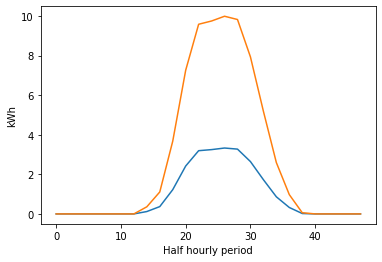

In [39]:
for site in pv_sites: 
    plt.plot(site.getOutput(dt)[4752:4800])
    
plt.ylabel("kWh")
plt.xlabel("Half hourly period")
plt.show()

## Energy System - Pulling it all together

In [14]:
class EnergySystem:
    """
    Base Energy System class

    Input
    -----
    nondispat : list
        List of non-dispatchable asset objects

    dispat : list
        List of dispatchable assets. The order of which determines control
        strategy in basic energy balance.

    dt : float
        time step

    T : float
        Number of time intervals
    """

    def __init__(self, nondispat, dispat, dt, T):
        self.nondispat = nondispat
        self.dispat = dispat
        self.assets = nondispat + dispat
        self.dt = dt  # time interval duration
        self.T = T  # number of time intervals

    def basic_energy_balance(self):
        """
        Basic energy system balancing. Dispatchable assets are deployed in
        order defined by list.

        Returns
        -------

        net_load : Array
            The net load of the system.
        """
        nondispat = self.nondispat  # nondispatcable asset list
        dispat = self.dispat  # dispatchable asset list

        # sum non-dispatchable assets
        net_nondis = np.zeros((self.T, 1))
        for i, asset in enumerate(nondispat):
            if asset.asset_type == 'DOMESTIC_LOAD':
                profile = nondispat[i].getOutput(self.dt)
            elif asset.asset_type == 'PV':
                profile = -1 * nondispat[i].getOutput(self.dt)  # might want -1 inside asset

            net_nondis += profile

        self.non_disp_load = net_nondis
        net_load = net_nondis

        # deploy dispatchable gen
        for i, asset in enumerate(dispat):
            surplus = net_load
            profile = asset.getOutput(surplus)
            net_load = surplus - profile

        self.net_load = net_load
        self.disp_load = net_load - net_nondis

        return net_load

Text(0.5, 0, 'Half hourly period')

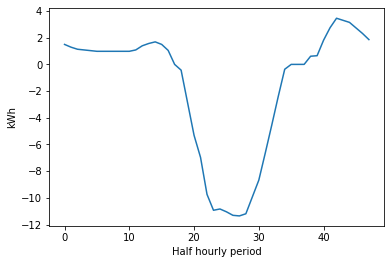

In [15]:
# setup
energy_system = ES.EnergySystem(non_dispatchable, dispatchable, dt, T)
# run
net_load = energy_system.basic_energy_balance()

plt.plot(net_load[4752:4800])
plt.ylabel("kWh")
plt.xlabel("Half hourly period")

In [21]:
## Integrating a market
market1 = MK.marketObject(energy_system, datetime.datetime(2017, 1, 1),
                          datetime.datetime(2017, 12, 31, 23, 59, 59))
# run
opCost = market1.getTotalCost()
grid_cost = market1.getGridCost().sum()
print('Operating cost: £ %3.3f' % (grid_cost / 100))

purchased, sold = market1.gridBreakdown()

purchased_daily = ES.E_to_dailyE(purchased, dt) / 100 # convert to £s
sold_daily = ES.E_to_dailyE(sold, dt) / 100 # convert to £s

Operating cost: £ 1778.795


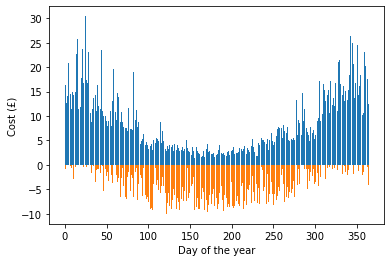

In [22]:
ax = plt.subplot(1,1,1)
p1 = plt.bar(range(365), purchased_daily)
p2 = plt.bar(range(365), sold_daily)
plt.xlabel("Day of the year")
plt.ylabel("Cost (£)")
plt.show()

For a clean version:

Link to [Notebook 2](LEO_3YP_OxEMF_Example.ipynb) or look at file `3YP_main.py`

## To think about...

- What types of dispatchable and non-dispatchable assets are relevant to your project.
- Start creating asset classes for each of these. Only needs to be simple model for operation at this stage.
- What data is important for modelling your energy system?